In [7]:
import pandas as pd

In [ ]:
# Load the data from the CSV file: output/pickup_hours_cq.csv, output/pickup_hours_hz.csv, output/pickup_hours_sh.csv
df_cq = pd.read_csv('../output/pickup_hours_cq.csv')
df_hz = pd.read_csv('../output/pickup_hours_hz.csv')
df_sh = pd.read_csv('../output/pickup_hours_sh.csv')

# Calculate probability of pickup for each city before merging
df_cq['prob'] = df_cq['count'] / df_cq['count'].sum()
df_hz['prob'] = df_hz['count'] / df_hz['count'].sum()
df_sh['prob'] = df_sh['count'] / df_sh['count'].sum()

# Merge the data from the three cities by the hour
df = pd.merge(df_cq, df_hz, on='hour', suffixes=('_cq', '_hz'))
df = pd.merge(df, df_sh, on='hour', suffixes=('', '_sh'))
df

,hour,count_cq,prob_cq,count_hz,prob_hz,count,prob
0,7,74244,0.131216,104836,0.110993,96197,0.135284
1,8,149855,0.264847,265406,0.280994,205193,0.288568
2,9,87435,0.154529,154008,0.163054,116641,0.164035
3,10,51751,0.091462,78316,0.082916,58827,0.082730
4,11,37248,0.065830,58166,0.061582,43457,0.061115
5,12,34290,0.060603,59574,0.063073,41737,0.058696
6,13,32974,0.058277,58415,0.061846,39400,0.055409
7,14,31813,0.056225,57892,0.061292,37599,0.052876
8,15,30398,0.053724,53221,0.056347,33715,0.047414
9,16,32868,0.058089,53309,0.056440,37416,0.052619


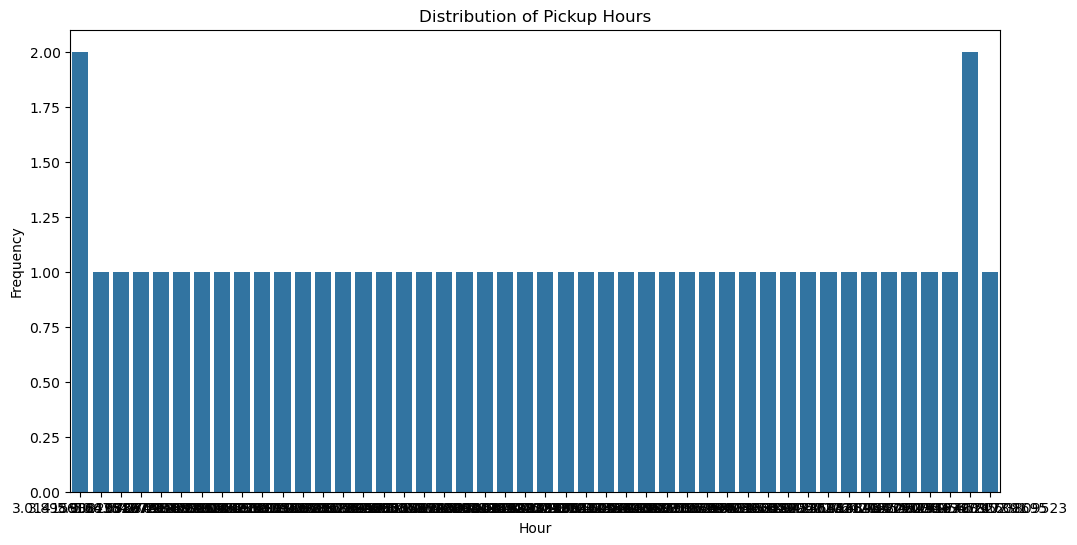

In [12]:
# Plot the distribution of the pickup hours
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(x='hour', data=df)
plt.title('Distribution of Pickup Hours')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.show()